In [9]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
df = pd.read_csv('cleaned_WI24_data_with_over_enrollment.csv')
df

,subj_course_id,sec_code,sec_id,available,waitlist,total,enrolled_ct,department_name,capacity_utilization
0,AAS 10,A01,303104,1,0,34,33,African American Studies,0.970588
1,AAS 10,A02,303108,0,0,35,35,African American Studies,1.000000
2,AAS 11,A01,303127,3,0,34,31,African American Studies,0.911765
3,AAS 11,A02,303133,6,0,34,28,African American Studies,0.823529
4,AESE 241,A00,301646,2,0,35,33,Aerospace Engineering and Engineering Mechanics,0.942857
...,...,...,...,...,...,...,...,...,...
215535,SIOB 242B,A00,327424,0,0,12,12,Scripps Institution of Oceanography Biology,1.000000
215536,SIOB 262,A00,410045,8,0,25,17,Scripps Institution of Oceanography Biology,0.680000
215537,SIOB 269,A00,475559,18,0,20,2,Scripps Institution of Oceanography Biology,0.100000
215538,SIOB 272,A01,327426,4,0,20,16,Scripps Institution of Oceanography Biology,0.800000


In [23]:
df = df.dropna(subset=['capacity_utilization', 'department_name', 'total'])
print(df['department_name'].nunique())

158


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213368 entries, 0 to 215539
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   subj_course_id        213368 non-null  object 
 1   sec_code              213368 non-null  object 
 2   sec_id                213368 non-null  int64  
 3   available             213368 non-null  int64  
 4   waitlist              213368 non-null  int64  
 5   total                 213368 non-null  int64  
 6   enrolled_ct           213368 non-null  int64  
 7   department_name       213368 non-null  object 
 8   capacity_utilization  213368 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 16.3+ MB


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Convert integer columns to float
df['available'] = df['available'].astype(float)
df['waitlist'] = df['waitlist'].astype(float)
df['total'] = df['total'].astype(float)
df['enrolled_ct'] = df['enrolled_ct'].astype(float)

formula = 'enrolled_ct ~ C(department_name)+ total'
# Fit the regression model using formula
model = smf.ols(formula = formula, data=df).fit()
# Print the summary of the regression model
print(model.summary())

/var/folders/z2/3p1x7x716ls1xf7_rclbghrr0000gp/T/ipykernel_55721/4012882148.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['available'] = df['available'].astype(float)
/var/folders/z2/3p1x7x716ls1xf7_rclbghrr0000gp/T/ipykernel_55721/4012882148.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['waitlist'] = df['waitlist'].astype(float)
/var/folders/z2/3p1x7x716ls1xf7_rclbghrr0000gp/T/ipykernel_55721/4012882148.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

                            OLS Regression Results                            
Dep. Variable:            enrolled_ct   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     3572.
Date:                Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:23:47   Log-Likelihood:            -7.2457e+05
No. Observations:              213368   AIC:                         1.449e+06
Df Residuals:                  213209   BIC:                         1.451e+06
Df Model:                         158                                         
Covariance Type:            nonrobust                                         
                                                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

## Check Linearity/Homoscedasticity

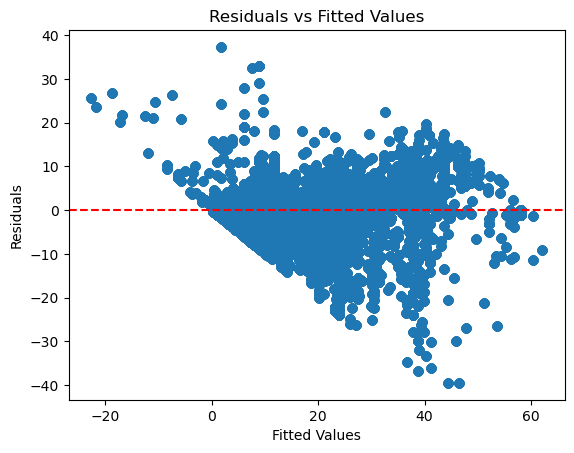

In [31]:
# Residuals and Fitted Values
residuals = model.resid
fitted = model.fittedvalues

# Plot Residuals vs Fitted Values
plt.scatter(fitted, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()

## Check Normality

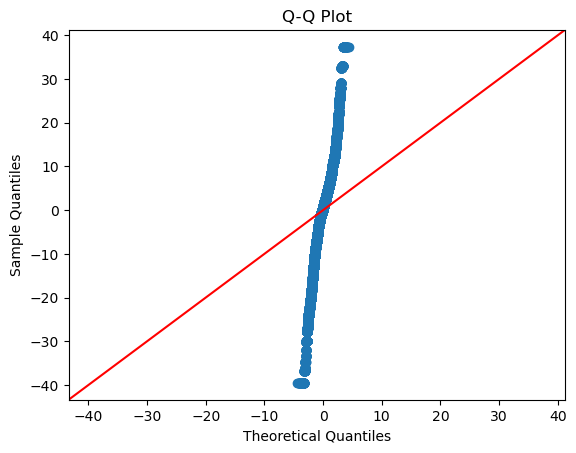

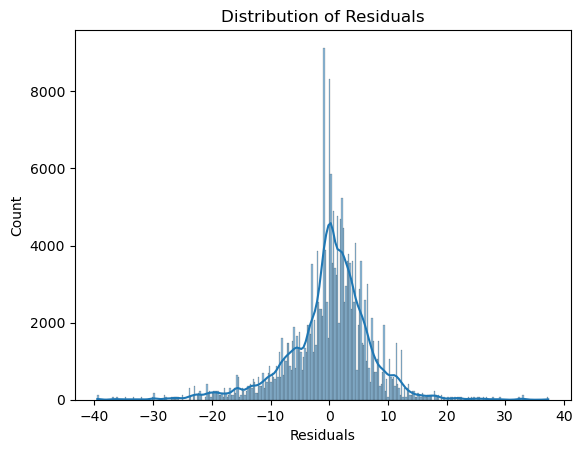

In [33]:
import statsmodels.api as sm
import seaborn as sns

# Q-Q plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

# Histogram of Residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [34]:
## check Multicollinearity with VIF

In [49]:
check_list = df['department_name'].unique().tolist()
check_list.append('total')

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# One-Hot Encode the categorical variable
df_encoded = pd.get_dummies(df, columns=['department_name'], drop_first=True, dtype = float)


# Prepare the data for VIF calculation
X = df_encoded[['total', 'department_name_Theatre and Dance Playwriting']]
X = sm.add_constant(X)  # Add constant term to the predictors

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                                         Feature       VIF
0                                          const  3.532786
1                                          total  1.000530
2  department_name_Theatre and Dance Playwriting  1.000530
